In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from scipy.stats import ttest_rel

load data and drop the target column cuz we don't use it

In [2]:
raw_data = pd.read_csv('/Users/erinburns/Library/CloudStorage/Box-Box/CoganLab/D_Data/GlobalLocal/combinedData.csv')
raw_data = raw_data.drop(columns=['target'])

get error and correct trial counts and acc and rt

In [3]:
subject_stats = raw_data.groupby('subject_ID').agg({
    'acc': ['mean', 'sum', 'count'],
    'RT': 'mean'
}).round(3)

# Flatten column names
subject_stats.columns = ['avg_acc', 'correct_trials', 'total_trials', 'avg_RT_all']
subject_stats['error_trials'] = subject_stats['total_trials'] - subject_stats['correct_trials']

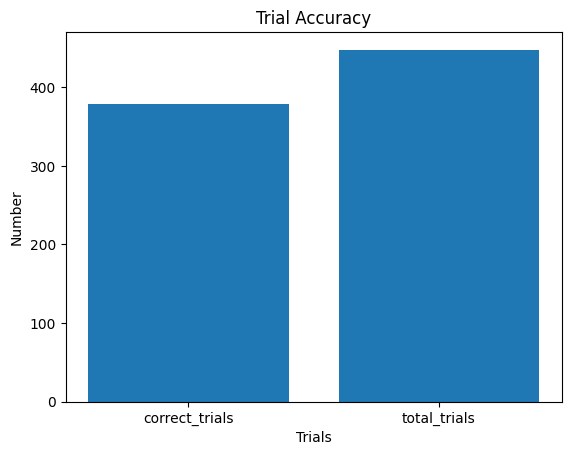

In [11]:
#plot acc
categories = ['correct_trials', 'total_trials']
values = subject_stats[categories].mean()

plt.bar(categories, values)

plt.xlabel('Trials')
plt.ylabel('Number')
plt.title('Trial Accuracy')

plt.show()

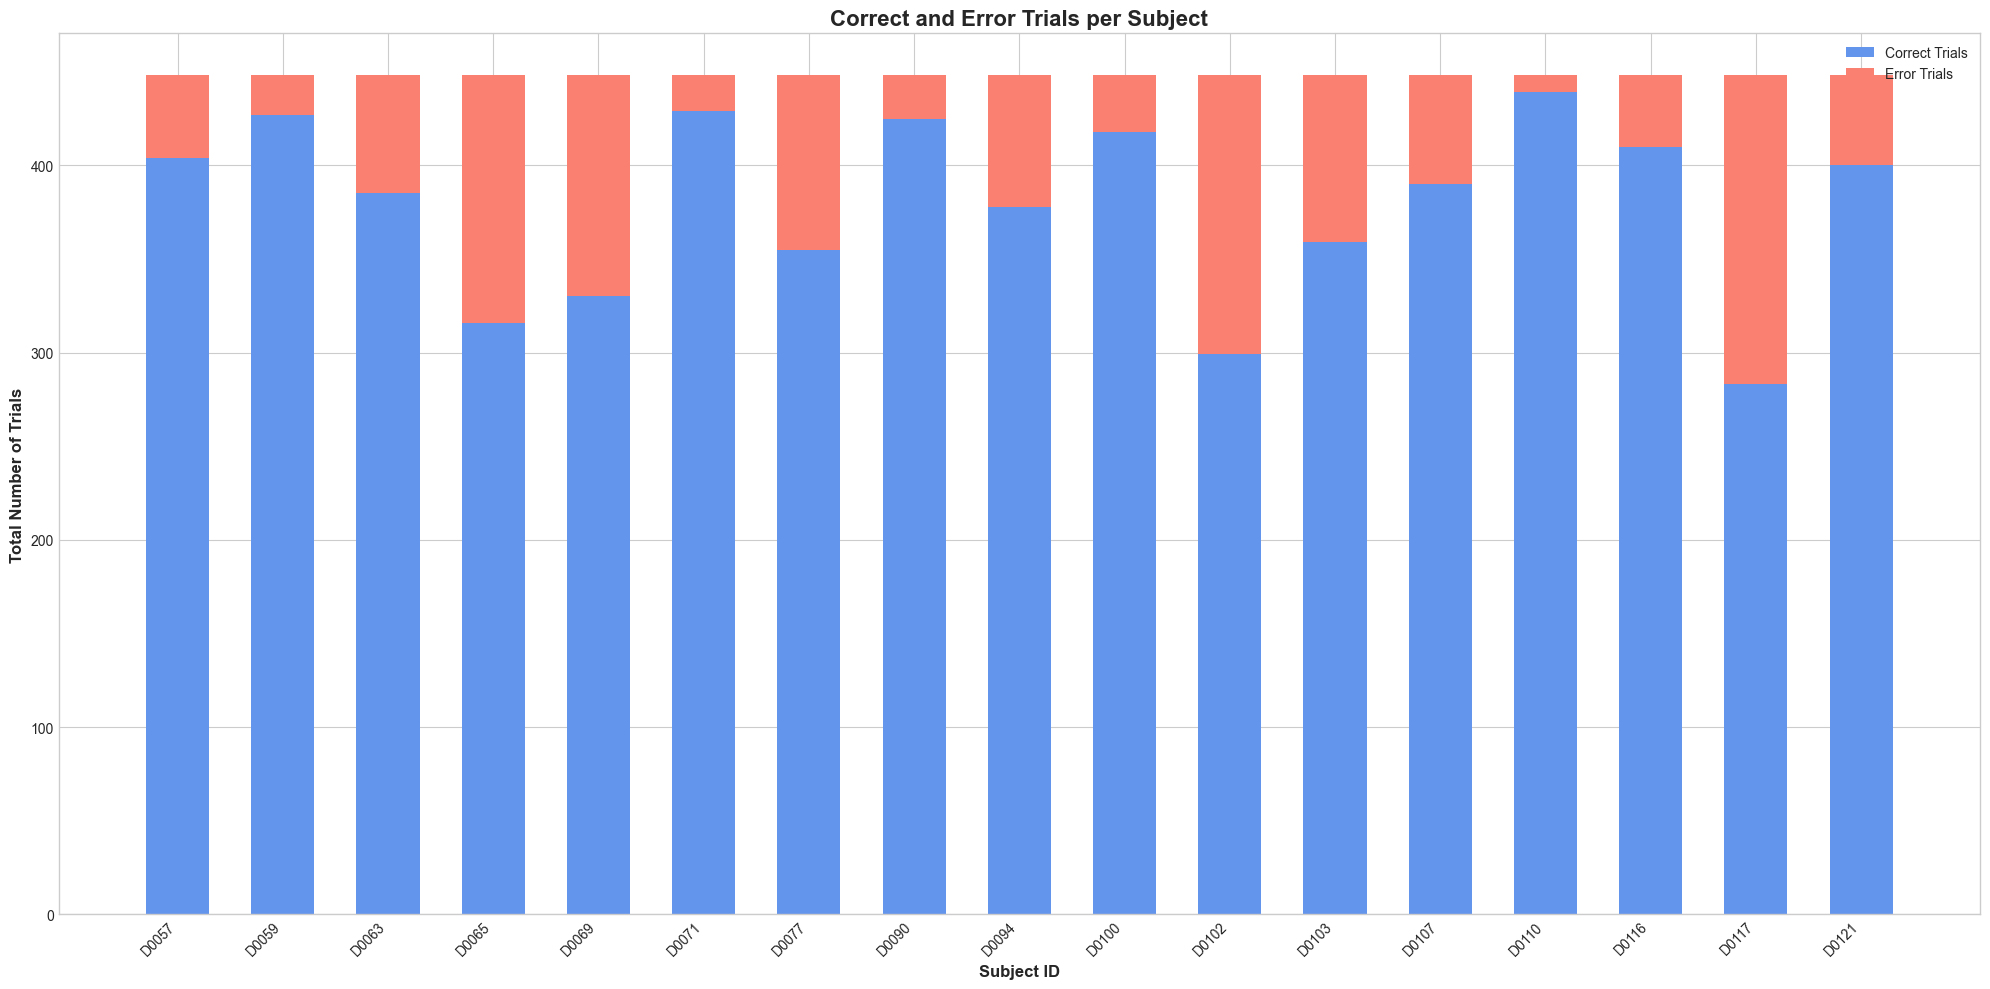

In [15]:
#acc and RT
mean_accuracy = subject_stats['avg_acc'].mean()
mean_rt = subject_stats['avg_RT_all'].mean()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(20, 10))
plt.style.use('seaborn-v0_8-whitegrid')

# Define bar positions
index = np.arange(len(subject_stats.index))
bar_width = 0.6 # A single, wider bar for each subject

# Plot the "Correct Trials" as the bottom part of the stack
ax.bar(index, subject_stats['correct_trials'], bar_width, 
       label='Correct Trials', color='cornflowerblue')

# Plot the "Error Trials" on top of the correct trials
ax.bar(index, subject_stats['error_trials'], bar_width, 
       bottom=subject_stats['correct_trials'], 
       label='Error Trials', color='salmon')

# Set labels and title
ax.set_xlabel('Subject ID', fontweight='bold', fontsize=12)
ax.set_ylabel('Total Number of Trials', fontweight='bold', fontsize=12)
ax.set_title('Correct and Error Trials per Subject', fontweight='bold', fontsize=16)
ax.set_xticks(index)
ax.set_xticklabels(subject_stats.index, rotation=45, ha="right")

# Add a legend
ax.legend(loc='upper right')

# Final adjustments and display
plt.tight_layout()
plt.show()


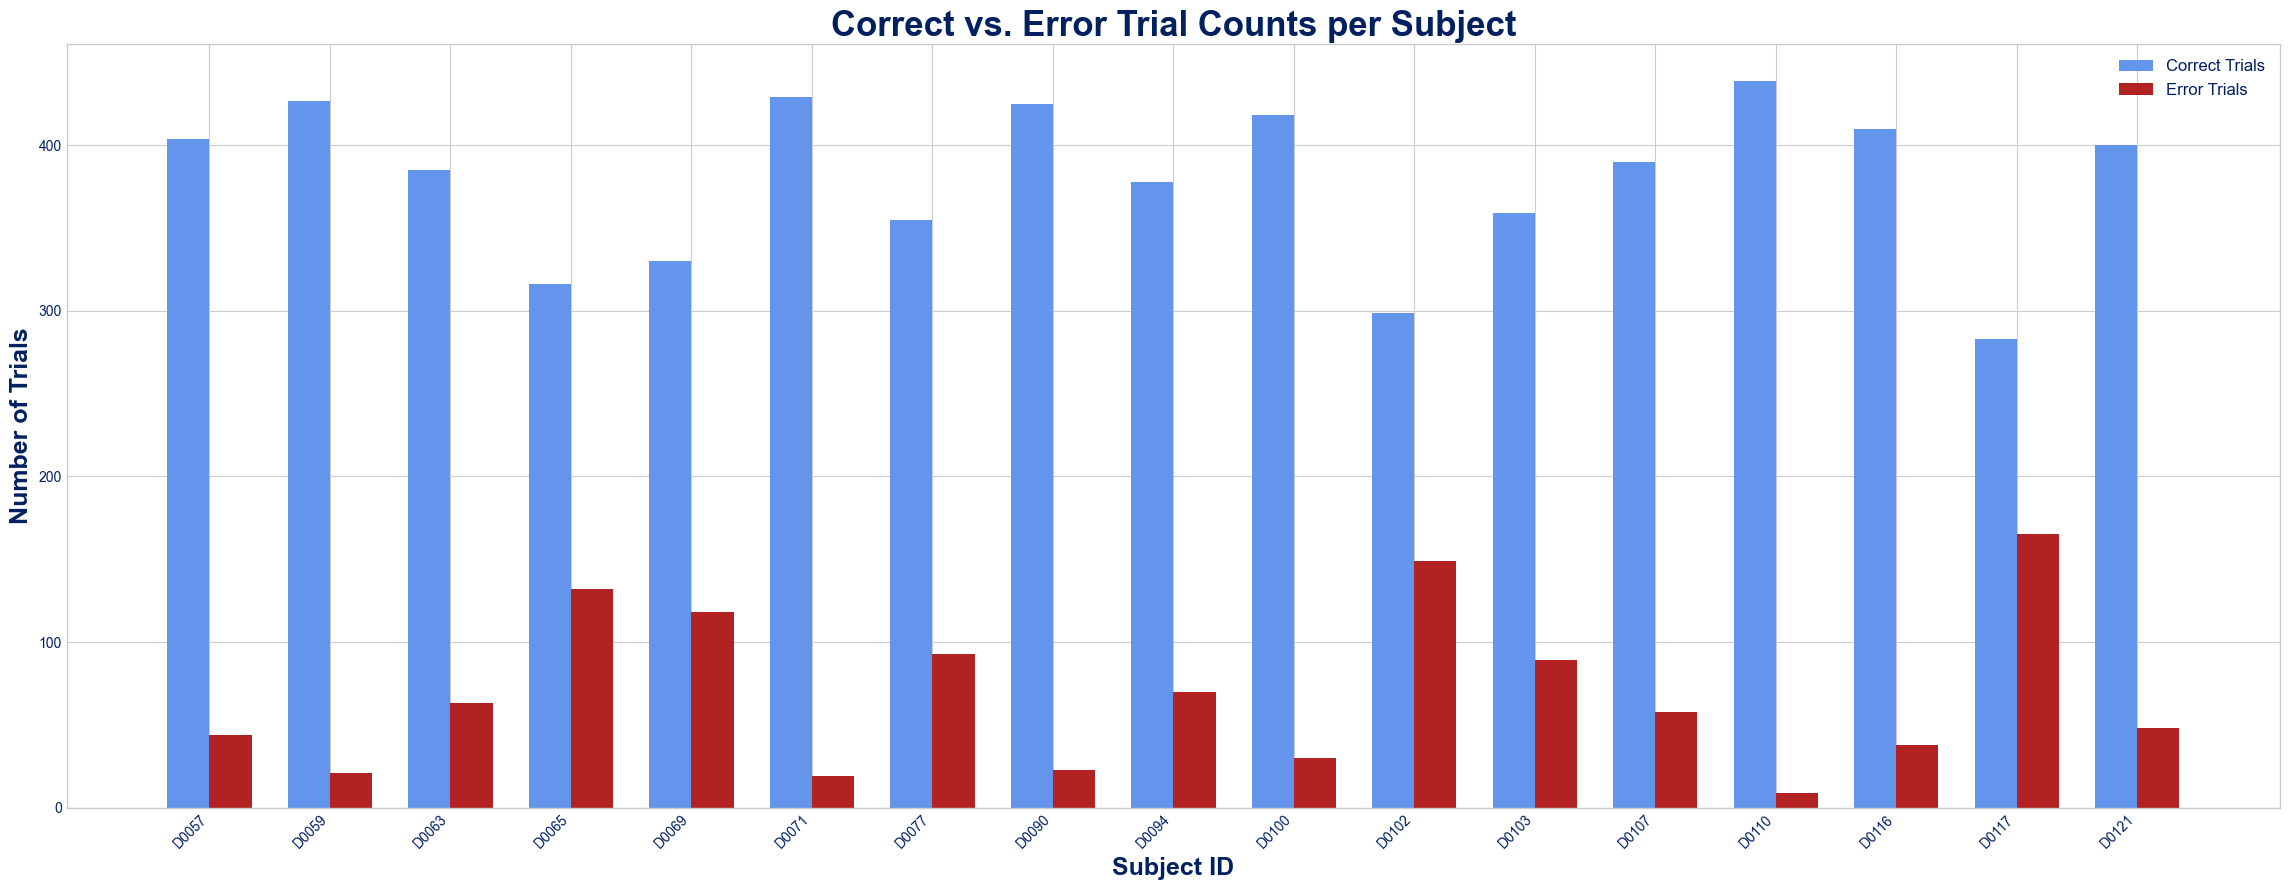

In [9]:
#bars separated
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(23, 9))
plt.style.use('seaborn-v0_8-whitegrid')

text_color = "#002060"

# Define bar width and positions
bar_width = 0.35
index = np.arange(len(subject_stats.index))

# Plot bars for correct and error trials side-by-side
ax.bar(index - bar_width/2, subject_stats['correct_trials'], bar_width, label='Correct Trials', color='cornflowerblue')
ax.bar(index + bar_width/2, subject_stats['error_trials'], bar_width, label='Error Trials', color='firebrick')

# Set labels and title
ax.set_xlabel('Subject ID', fontweight='bold', fontsize=18, color=text_color)
ax.set_ylabel('Number of Trials', fontweight='bold', fontsize=18, color=text_color)
ax.set_title('Correct vs. Error Trial Counts per Subject', fontweight='bold', fontsize=25, color=text_color)
ax.set_xticks(index)
ax.set_xticklabels(subject_stats.index, rotation=45, ha="right")

ax.tick_params(axis='x', colors=text_color) 
ax.tick_params(axis='y', colors=text_color)

ax.legend(loc='upper right', fontsize=12, labelcolor=text_color)

# Final adjustments and display
plt.tight_layout()
plt.show()

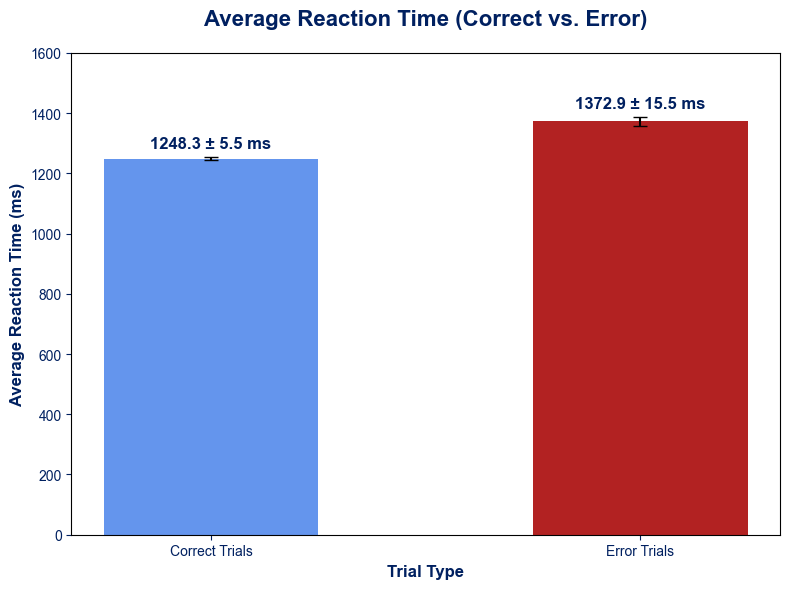

In [4]:
# --- Calculate Overall Average RT and Standard Error (SEM) ---
# For correct trials
correct_trials_rt = raw_data[raw_data['acc'] == 1]['RT']
avg_rt_correct = correct_trials_rt.mean()
sem_rt_correct = correct_trials_rt.sem() 

# For error trials
error_trials_rt = raw_data[raw_data['acc'] == 0]['RT']
avg_rt_error = error_trials_rt.mean()
sem_rt_error = error_trials_rt.sem() 

#set text color
text_color = "#002060"


# --- Plotting Section ---

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# Define the categories and their corresponding values
categories = ['Correct Trials', 'Error Trials']
values = [avg_rt_correct, avg_rt_error]
errors = [sem_rt_correct, sem_rt_error]
colors = ['cornflowerblue', 'firebrick']

# Plot the bars with error bars
ax.bar(categories, values, yerr=errors, color=colors, width=0.5, 
       capsize=5, ecolor='black')

# Add text labels on top of each bar
for i, (value, error) in enumerate(zip(values, errors)):
    # Set the y position of the text to be slightly above the error bar
    text_y = value + error + 20 # Increased offset for ms scale
    # Updated text format to include ± SEM and one decimal place
    ax.text(i, text_y, f'{value:.1f} ± {error:.1f} ms', ha='center', va='bottom', fontsize=12, fontweight='bold', color=text_color)

# Set labels and title
ax.set_ylabel('Average Reaction Time (ms)', fontweight='bold', fontsize=12, color=text_color)
ax.set_xlabel("Trial Type", fontweight='bold', fontsize=12, color=text_color)
ax.set_title('Average Reaction Time (Correct vs. Error)', fontweight='bold', fontsize=16, pad=20, color=text_color)

ax.tick_params(axis='x', colors=text_color) 
ax.tick_params(axis='y', colors=text_color)

# --- Set the y-axis to end exactly at 1600 ---
ax.set_ylim(0, 1600) 

# Final adjustments and display
plt.tight_layout()
plt.show()



Paired T-Test Results:
T-statistic: -5.756
P-value: 2.9508324665946996e-05


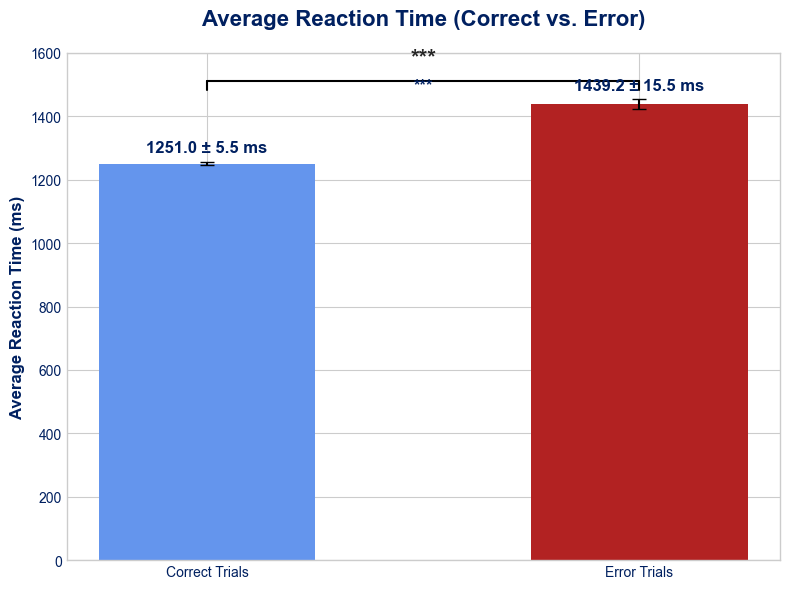

In [16]:
#RT with ttest
# --- 1. Calculate Average RT for Correct and Error trials PER SUBJECT ---
rt_by_condition = raw_data.groupby(['subject_ID', 'acc'])['RT'].mean().unstack()
rt_by_condition.columns = ['avg_RT_error', 'avg_RT_correct']

# Drop subjects that might not have both conditions (e.g., no errors)
rt_by_condition.dropna(inplace=True)

# --- 2. Perform the Paired T-Test ---
# The test is performed on the list of subject averages for each condition
t_statistic, p_value = ttest_rel(rt_by_condition['avg_RT_correct'], rt_by_condition['avg_RT_error'])

if p_value < 0.001:
    p_text = "p < 0.001"
else:
    p_text = f"p = {p_value:.3f}"

print("Paired T-Test Results:")
print(f"T-statistic: {t_statistic:.3f}")
print(f"P-value: {p_value}")

# --- 3. Calculate Overall Averages for Plotting ---
avg_rt_correct = rt_by_condition['avg_RT_correct'].mean()
avg_rt_error = rt_by_condition['avg_RT_error'].mean()

# --- 4. Plotting Section ---
fig, ax = plt.subplots(figsize=(8, 6))
plt.style.use('seaborn-v0_8-whitegrid')
#set text color
text_color = "#002060"

# --- Add annotation for the p-value with stars ---
y_max = max(values)
line_y = y_max * 1.05
text_y = y_max * 1.08
tick_height = y_max * 0.02

# Draw the horizontal bar spanning the two groups
ax.plot([0, 1], [line_y, line_y], color='black', lw=1.5)
# Add vertical ticks at the ends of the bar
ax.plot([0, 0], [line_y - tick_height, line_y], color='black', lw=1.5)
ax.plot([1, 1], [line_y - tick_height, line_y], color='black', lw=1.5)


# Determine the star notation based on the p-value
if p_value < 0.001:
    p_text = '***'
elif p_value < 0.01:
    p_text = '**'
elif p_value < 0.05:
    p_text = '*'
else:
    p_text = 'n.s.' # not significant

# Add the star text above the bar
ax.text(0.5, text_y, p_text, ha='center', va='bottom', fontsize=16, fontweight='bold')

categories = ['Correct Trials', 'Error Trials']
values = [avg_rt_correct, avg_rt_error]
colors = ['cornflowerblue', 'firebrick']

# Plot the bars with error bars
ax.bar(categories, values, yerr=errors, color=colors, width=0.5, 
       capsize=5, ecolor='black')

# Add text labels on top of each bar
for i, (value, error) in enumerate(zip(values, errors)):
    # Set the y position of the text to be slightly above the error bar
    text_y = value + error + 20 # Increased offset for ms scale
    # Updated text format to include ± SEM and one decimal place
    ax.text(i, text_y, f'{value:.1f} ± {error:.1f} ms', ha='center', va='bottom', fontsize=12, fontweight='bold', color=text_color)


# --- Add annotation for the p-value ---
# This draws a line between the two bars and places the p-value text above it
y_max = max(values)
#line_y = y_max * 1.05
#text_y = y_max * 1.08
#ax.plot([0, 1], [line_y, line_y], color='black', lw=1.5)
ax.text(0.5, text_y, p_text, ha='center', va='bottom', fontsize=12, fontweight='bold', color=text_color)


# --- Final Formatting ---
ax.set_ylabel('Average Reaction Time (ms)', fontweight='bold', fontsize=12, color=text_color)
ax.set_title('Average Reaction Time (Correct vs. Error)', fontweight='bold', fontsize=16, pad=20, color=text_color)
ax.set_ylim(0, y_max * 1.25)

ax.tick_params(axis='x', colors=text_color) 
ax.tick_params(axis='y', colors=text_color)

# --- Set the y-axis to end exactly at 1600 ---
ax.set_ylim(0, 1600) 

plt.tight_layout()
plt.show()
